In [1]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [4]:
# Load dataset
df = pd.read_csv("Indian-Resturants (2).csv")

In [6]:
# Display first few rows
display(df.head())

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [9]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [12]:
# Basic Composition
print(df.shape)

(211944, 26)


In [18]:
# Check for missing values
print(df.isnull().sum())

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64


In [13]:
# Handling missing values
df = df.dropna()

In [15]:
# Descriptive Statistics
display(df.describe())

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,4.837800e+04,48378.000000,48378.000000,48378.000000,48378.0,48378.000000,48378.000000,48378.000000,48378.000000,48378.000000,48378.0,48378.000000,48378.0
mean,1.006326e+07,2411.117553,21.712717,77.728200,1.0,825.637314,2.185518,3.941783,718.446195,520.912584,0.0,-0.156827,-1.0
std,8.830432e+06,4615.225564,45.819881,4.817128,0.0,809.923912,0.962620,0.644347,1381.969515,1114.602244,0.0,0.986139,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-3.000000,0.000000,0.0,-1.000000,-1.0
25%,1.200070e+05,6.000000,15.588318,74.826201,1.0,350.000000,1.000000,3.800000,104.000000,25.000000,0.0,-1.000000,-1.0
50%,1.802264e+07,12.000000,22.525714,77.220079,1.0,600.000000,2.000000,4.000000,307.000000,137.000000,0.0,-1.000000,-1.0
75%,1.870862e+07,37.000000,26.848224,80.220101,1.0,1000.000000,3.000000,4.300000,799.000000,493.000000,0.0,1.000000,-1.0
max,1.915215e+07,11354.000000,10000.000000,91.811354,1.0,30000.000000,4.000000,4.900000,42539.000000,15545.000000,0.0,1.000000,-1.0


In [28]:
# Filling missing values if necessary
df.fillna("Not Available", inplace=True)

C:\Users\Pc\AppData\Local\Temp\ipykernel_6620\3008537553.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Available' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Not Available", inplace=True)


In [46]:
# Basic Statistics - Average Rating
avg_rating = df['aggregate_rating'].mean()
print(f"Average Rating: {avg_rating:.2f}")

Average Rating: 3.03


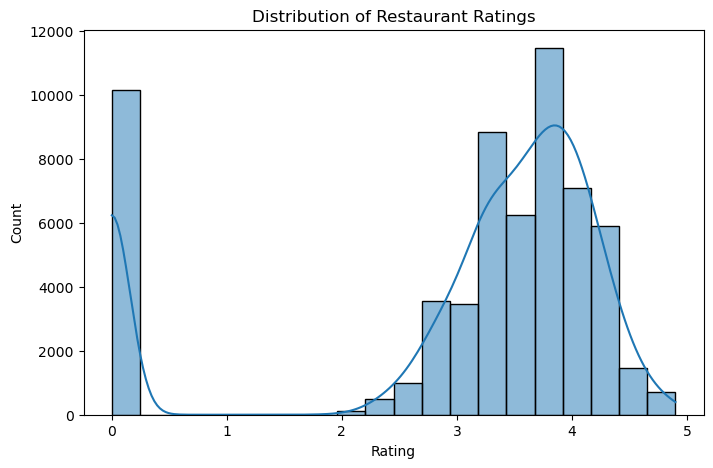

In [48]:
# Rating distribution
plt.figure(figsize=(8,5))
sns.histplot(df['aggregate_rating'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [52]:
# Location Analysis
top_city = df['city'].value_counts().idxmax()
print(f"City with highest restaurants: {top_city}")

City with highest restaurants: Chennai


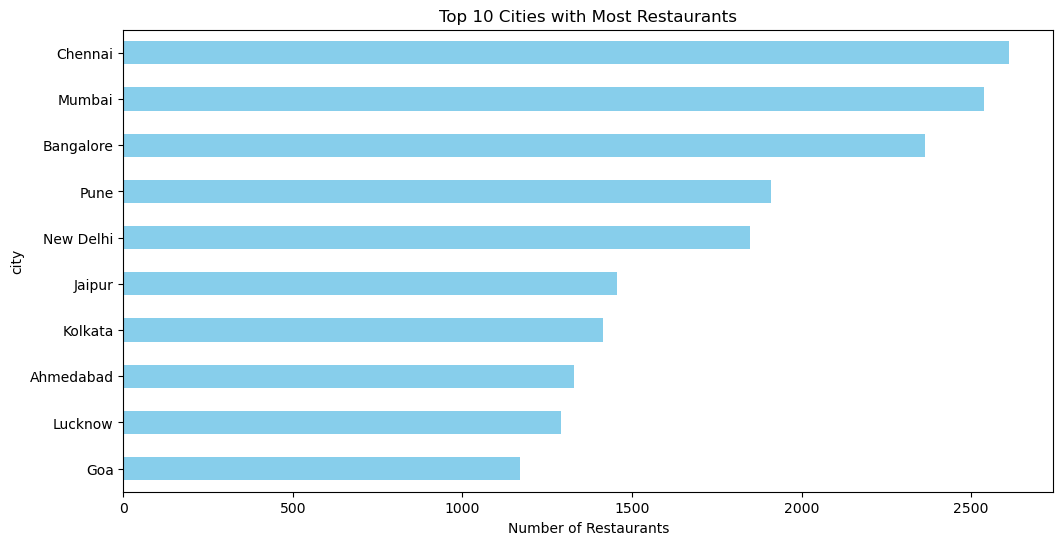

In [54]:
# City with highest number of restaurants
plt.figure(figsize=(12,6))
df['city'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.gca().invert_yaxis()
plt.show()

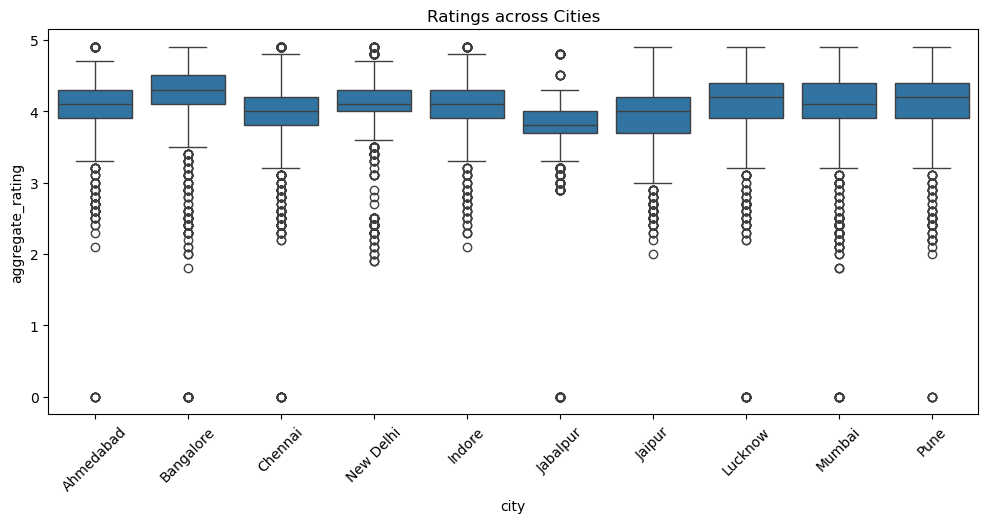

In [21]:
# Ratings across cities
plt.figure(figsize=(12,5))
sns.boxplot(x='city', y='aggregate_rating', data=df[df['city'].isin(df['city'].value_counts().head(10).index)])
plt.xticks(rotation=45)
plt.title("Ratings across Cities")
plt.show()

In [66]:
# Cuisine Analysis
cuisine_counts = df['cuisines'].value_counts().head(10)
print("Top 10 Cuisines:\n", cuisine_counts)

Top 10 Cuisines:
 cuisines
North Indian             4587
Fast Food                2137
North Indian, Chinese    1720
Bakery                   1618
South Indian             1600
Street Food              1221
Cafe                     1180
Mithai                   1032
Desserts                  950
Bakery, Desserts          872
Name: count, dtype: int64


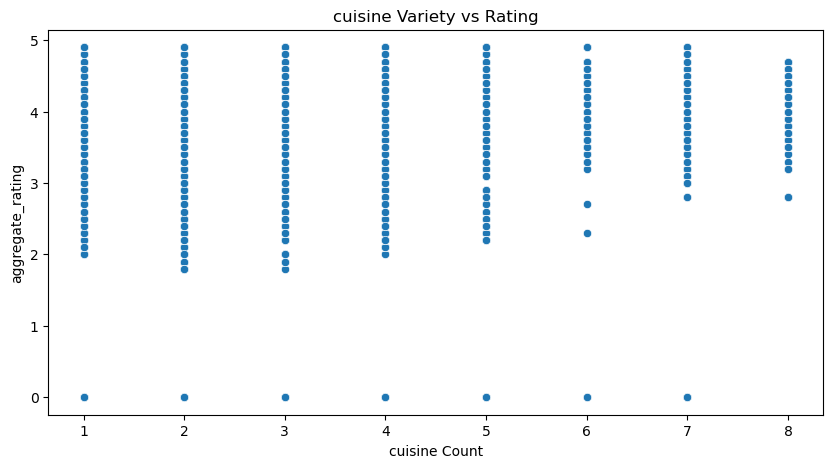

In [25]:
plt.figure(figsize=(10,5))
df['cuisine Count'] = df['cuisines'].apply(lambda x: len(str(x).split(',')))
sns.scatterplot(x='cuisine Count', y='aggregate_rating', data=df)
plt.title("cuisine Variety vs Rating")
plt.show()

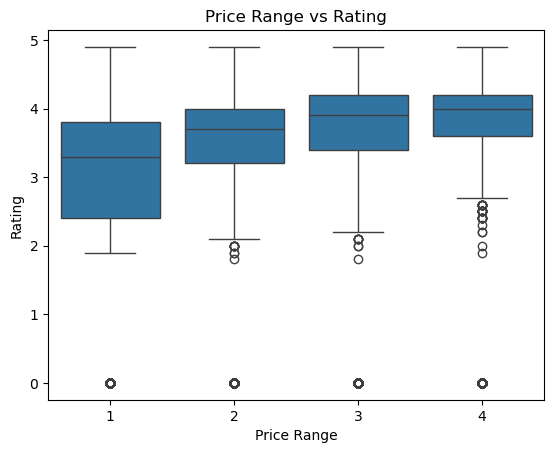

In [90]:
# Price Range and Rating
sns.boxplot(x='price_range', y='aggregate_rating', data=df)
plt.title("Price Range vs Rating")
plt.xlabel("Price Range")
plt.ylabel("Rating")
plt.show()

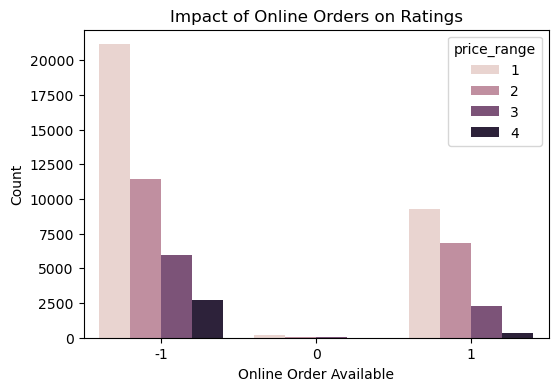

In [106]:
# Online Order & Table Booking
plt.figure(figsize=(6,4))
sns.countplot(x='delivery' , hue='price_range', data=df)
plt.title('Impact of Online Orders on Ratings')
plt.xlabel('Online Order Available')
plt.ylabel('Count')
plt.show()

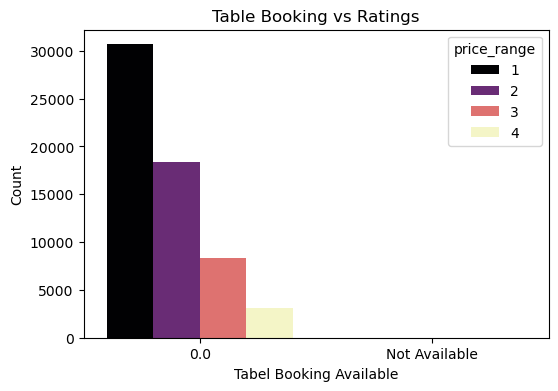

In [108]:
# Table Booking Analysis
plt.figure(figsize=(6,4))
sns.countplot(x='opentable_support',  hue='price_range', data=df, palette='magma')
plt.title('Table Booking vs Ratings')
plt.xlabel('Tabel Booking Available')
plt.ylabel ('Count')
plt.show()

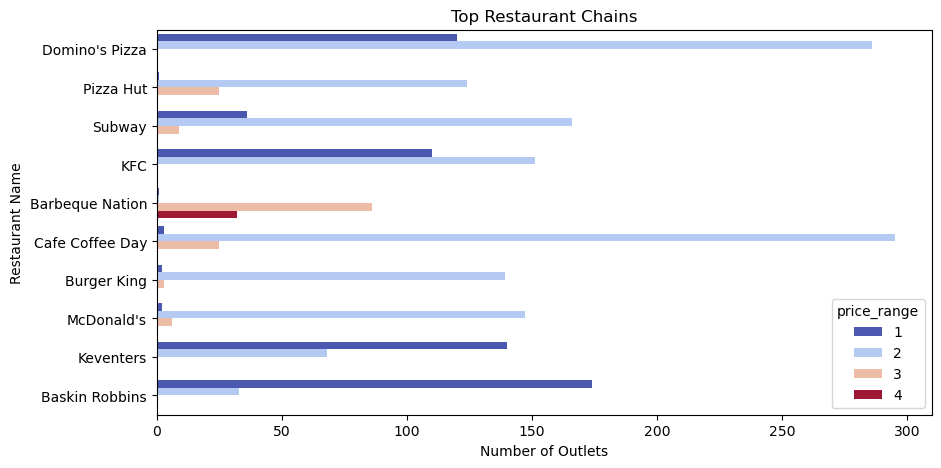

In [140]:
# Top Restaurant Chains
plt.figure(figsize=(10,5))
top_chains = df['name'].value_counts().head(10).index
df_top_chains = df[df['name'].isin(top_chains)]
sns.countplot(y='name', hue='price_range', data=df_top_chains, palette='coolwarm')
plt.title('Top Restaurant Chains' )
plt.xlabel("Number of Outlets")
plt.ylabel('Restaurant Name')
plt.show()

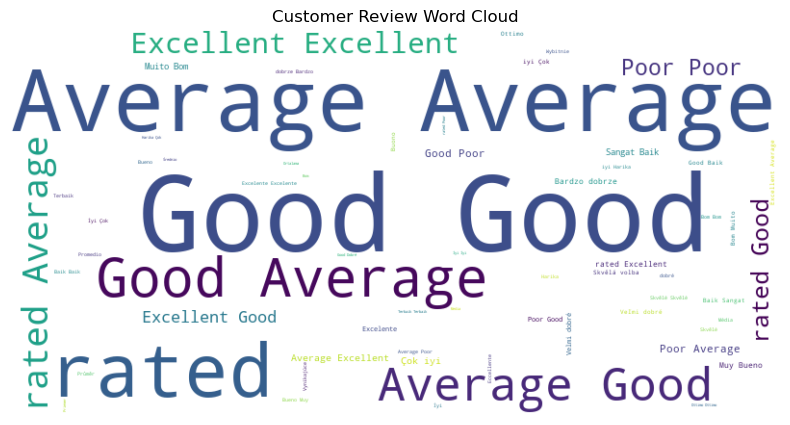

In [156]:
# Word Cloud 
# Word Cloud for Reviews
text = " ".join(review for review in df['rating_text'].dropna())
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Customer Review Word Cloud")
plt.show()

